## Feature Extraction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])

In [6]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
x=df.drop(columns=["Sex"])
y=df["Sex"]

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain)
sc_xtest=sc.fit_transform(xtest)

In [10]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(sc_xtrain)
pca.explained_variance_ratio_

array([0.83469694, 0.08793705, 0.03523515, 0.02127232, 0.01045998,
       0.00802925, 0.00153214, 0.00083718])

In [11]:
# elbow plot for variance_dimension
val=np.cumsum(pca.explained_variance_ratio_)*100
val

array([ 83.46969402,  92.26339863,  95.78691341,  97.91414511,
        98.96014266,  99.76306798,  99.91628212, 100.        ])

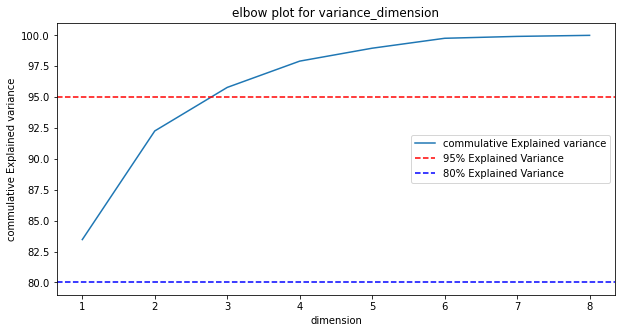

In [12]:
plt.figure(figsize=(10,5))
plt.plot(range(1,len(val)+1),val,label="commulative Explained variance")
plt.axhline(y=95,color='r',linestyle='--',label="95% Explained Variance")
plt.axhline(y=80,color='b',linestyle='--',label="80% Explained Variance")
plt.title("elbow plot for variance_dimension")
plt.xlabel("dimension")
plt.ylabel("commulative Explained variance")
plt.legend()

In [13]:
pca=PCA(n_components=0.95)
pca.fit(sc_xtrain)
pca_xtrain=pca.transform(sc_xtrain)
pca_xtest=pca.transform(sc_xtest)

In [14]:
pca.n_components_

3

## Visualization

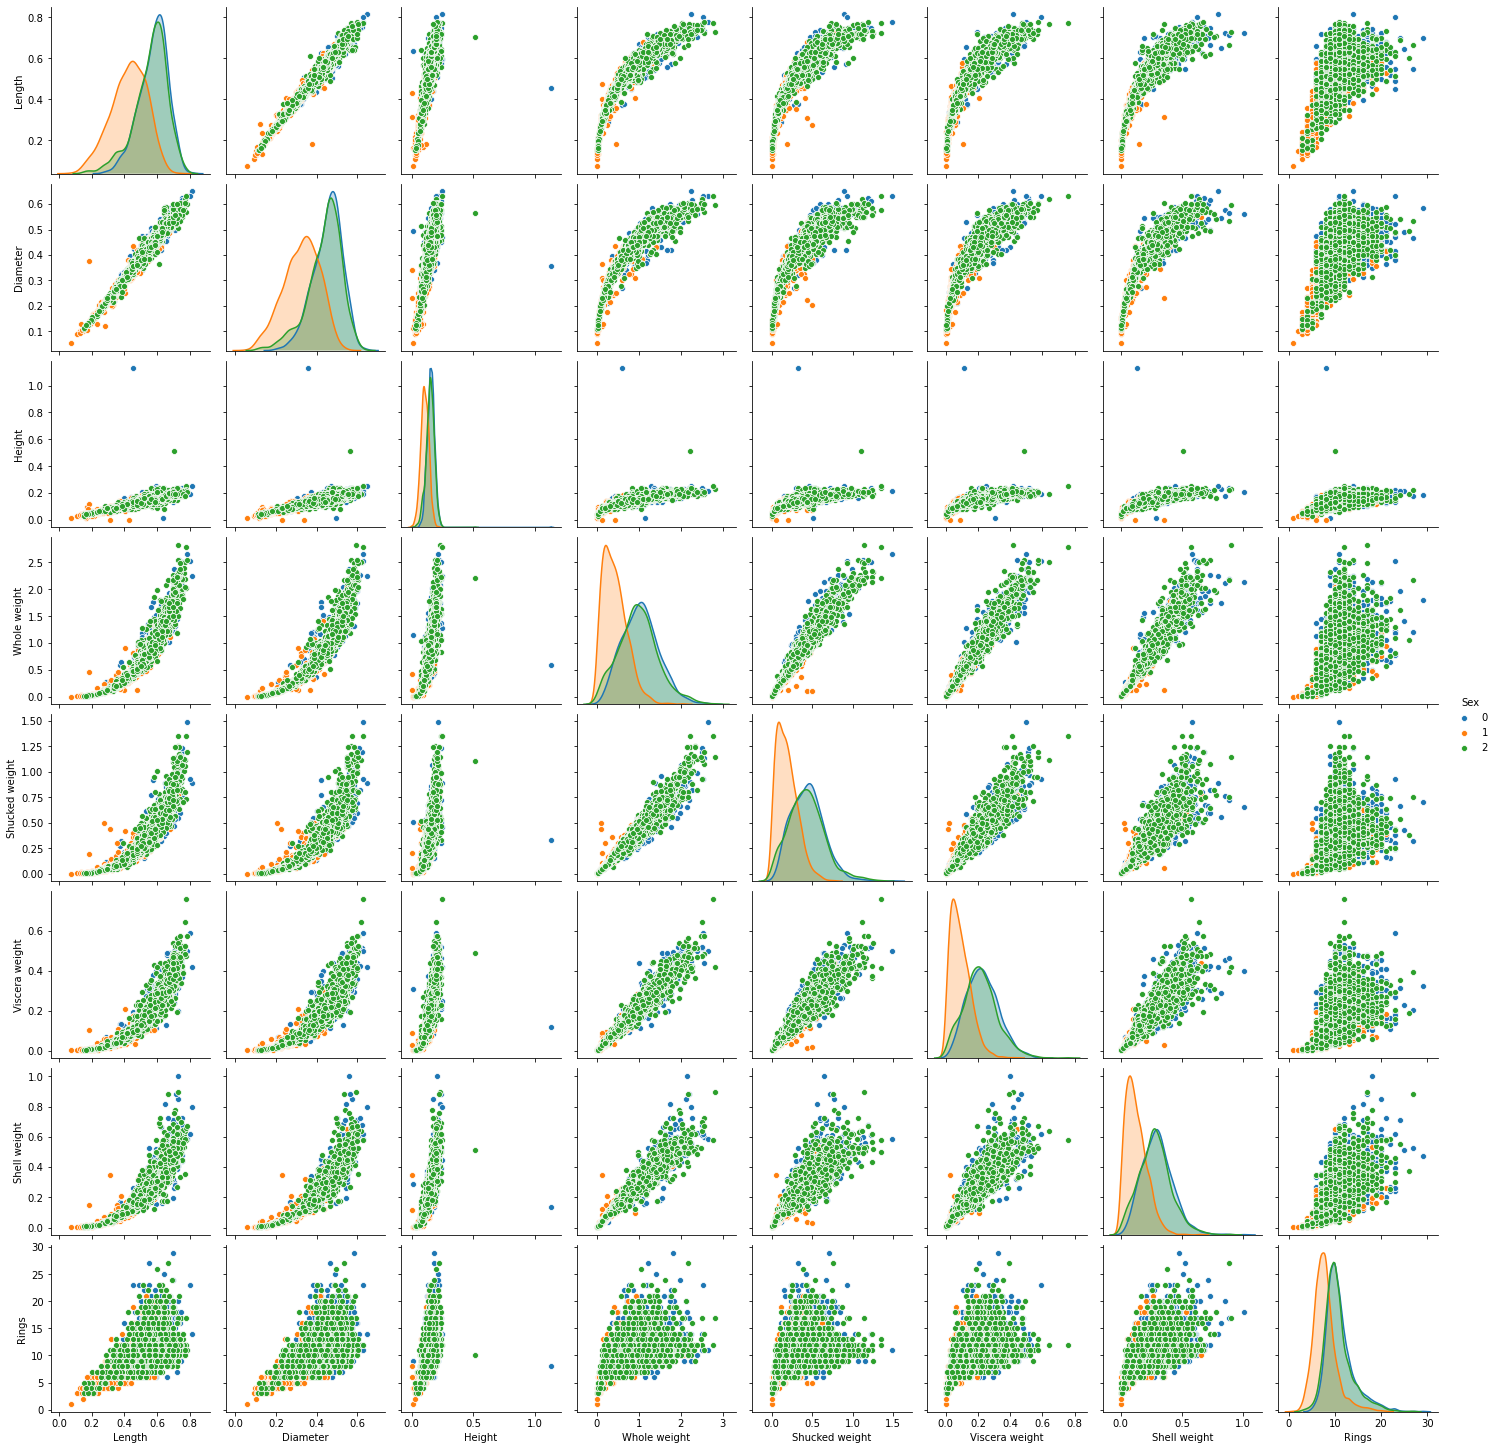

In [16]:
import seaborn as sns
sns.pairplot(data=df,hue="Sex")

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=df.drop(columns="Sex")
pca_x=pca.fit_transform(x)
label=df["Sex"]

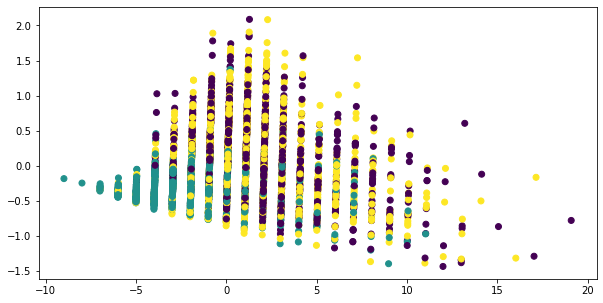

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(pca_x[:,0],pca_x[:,1],c=label)

In [24]:
import plotly.express as px
fig=px.scatter(pca_x,x=0,y=1,color=df["Sex"])
fig.show()

In [25]:
pca=PCA(n_components=3)
pca_x=pca.fit_transform(x)

In [26]:
fig=px.scatter_3d(pca_x,x=0,y=1,z=2,color=df["Sex"])
fig.show()